In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '../../')
from src.encode_data import *
from src.midi_data import *
from src.data_sources import process_all, arr2csv
from src.midi_transform import *
from src.fastai_data import *

In [3]:
import traceback
import time

## Standardize and reformat raw midi files before encoding to text
- Transform key to C major
- Remove unused instruments
- Combine multiple tracks with the same instrument into a single part
- Melody, Piano, String

### Load midi data

In [6]:
# input_file = 'data/midi/v15/midi_sources/freemidi/genre-dance-eletric/Antiloop - This Is The Night.mid'
# input_file = 'data/midi/v15/midi_sources/freemidi/genre-pop/James Taylor - Anywhere Like Heaven.mid'
# input_file = 'data/midi/v15/midi_sources/midiworld/named_midi/Walter_Egan_-_Magnet_and_Steel.mid'
input_file = 'data/midi/v15/midi_sources/freemidi/genre-dance-eletric/Kylie Minogue - Fever.mid'

In [7]:
midi_file = compress_midi_file(input_file, cutoff=3)

In [8]:
stream = file2stream(midi_file)

In [14]:
music_file = file2mf(input_file)

info_tracks = [t for t in music_file.tracks if not t.hasNotes()]
note_tracks = [t for t in music_file.tracks if t.hasNotes()]


In [15]:
variation_count = [len({ e.pitch for e in t.events }) for t in note_tracks]; variation_count

[18, 13, 11, 6, 7, 16, 26, 9, 2, 24, 25, 30, 44]

In [13]:
variation_count = [{ e.pitch for e in t.events } for t in note_tracks]; variation_count

[{100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  37,
  40,
  45,
  47,
  49,
  50,
  52,
  54,
  56,
  57,
  71,
  78,
  83,
  85,
  87,
  88,
  90,
  92,
  93,
  95,
  96,
  97,
  98,
  None},
 {45,
  47,
  50,
  52,
  54,
  56,
  57,
  59,
  61,
  62,
  63,
  64,
  66,
  68,
  69,
  71,
  73,
  74,
  75,
  76,
  78,
  80,
  81,
  83,
  85,
  87,
  88,
  90,
  92,
  None},
 {26,
  27,
  28,
  29,
  30,
  32,
  33,
  34,
  35,
  36,
  38,
  40,
  41,
  42,
  43,
  44,
  46,
  49,
  52,
  54,
  56,
  58,
  70,
  73,
  82,
  None},
 {50,
  52,
  54,
  57,
  59,
  62,
  64,
  66,
  68,
  69,
  71,
  73,
  74,
  75,
  76,
  78,
  80,
  81,
  83,
  85,
  87,
  88,
  90,
  92,
  None},
 {23,
  25,
  26,
  28,
  30,
  32,
  33,
  35,
  37,
  38,
  40,
  42,
  44,
  45,
  47,
  49,
  52,
  54,
  56,
  57,
  61,
  64,
  66,
  None},
 {25, 26, 28, 30, 32, 33, 35, 37, 38, 39, 40, 42, 44, 45, 47, 52, 56, N

In [12]:
event_count = [len(t.events) for t in note_tracks]; event_count

[1116, 5576, 6814, 3828, 884, 2668, 220, 1798, 1706, 64, 464, 236, 52]

In [10]:
def track_sort(t):
    return len({ e.pitch for e in t.events }), len(t.events)
note_tracks = sorted(note_tracks, key=track_sort, reverse=True)

In [9]:

def compress_midi_file(fp, cutoff=6, supported_types=set([Track.PIANO, Track.PLUCK, Track.BRIGHT])):
    music_file = file2mf(fp)
    
    info_tracks = [t for t in music_file.tracks if not t.hasNotes()]
    note_tracks = [t for t in music_file.tracks if t.hasNotes()]
    
    if len(note_tracks) > cutoff:
        note_tracks = sorted(note_tracks, key=lambda x: len(x.events), reverse=True)
        
    supported_tracks = []
    for idx,t in enumerate(note_tracks):
        track_type = get_track_type(t)
#         if track_type == Track.UNDEF: print('Could not designate track:', fp, t)
        if len(supported_tracks) >= cutoff: break
        if track_type not in supported_types: continue
        change_track_instrument(t, type2inst[track_type])
        supported_tracks.append(t)
    if not supported_tracks: return None
    music_file.tracks = info_tracks + supported_tracks
    return music_file

In [21]:
stream.flat.duration.quarterLength * 4

Fraction(2188, 3)

In [24]:
stream.highestTime

182.33333333333334

In [22]:
2188/3

729.3333333333334

In [18]:
int(round(stream.flat.duration.quarterLength * 4))

729

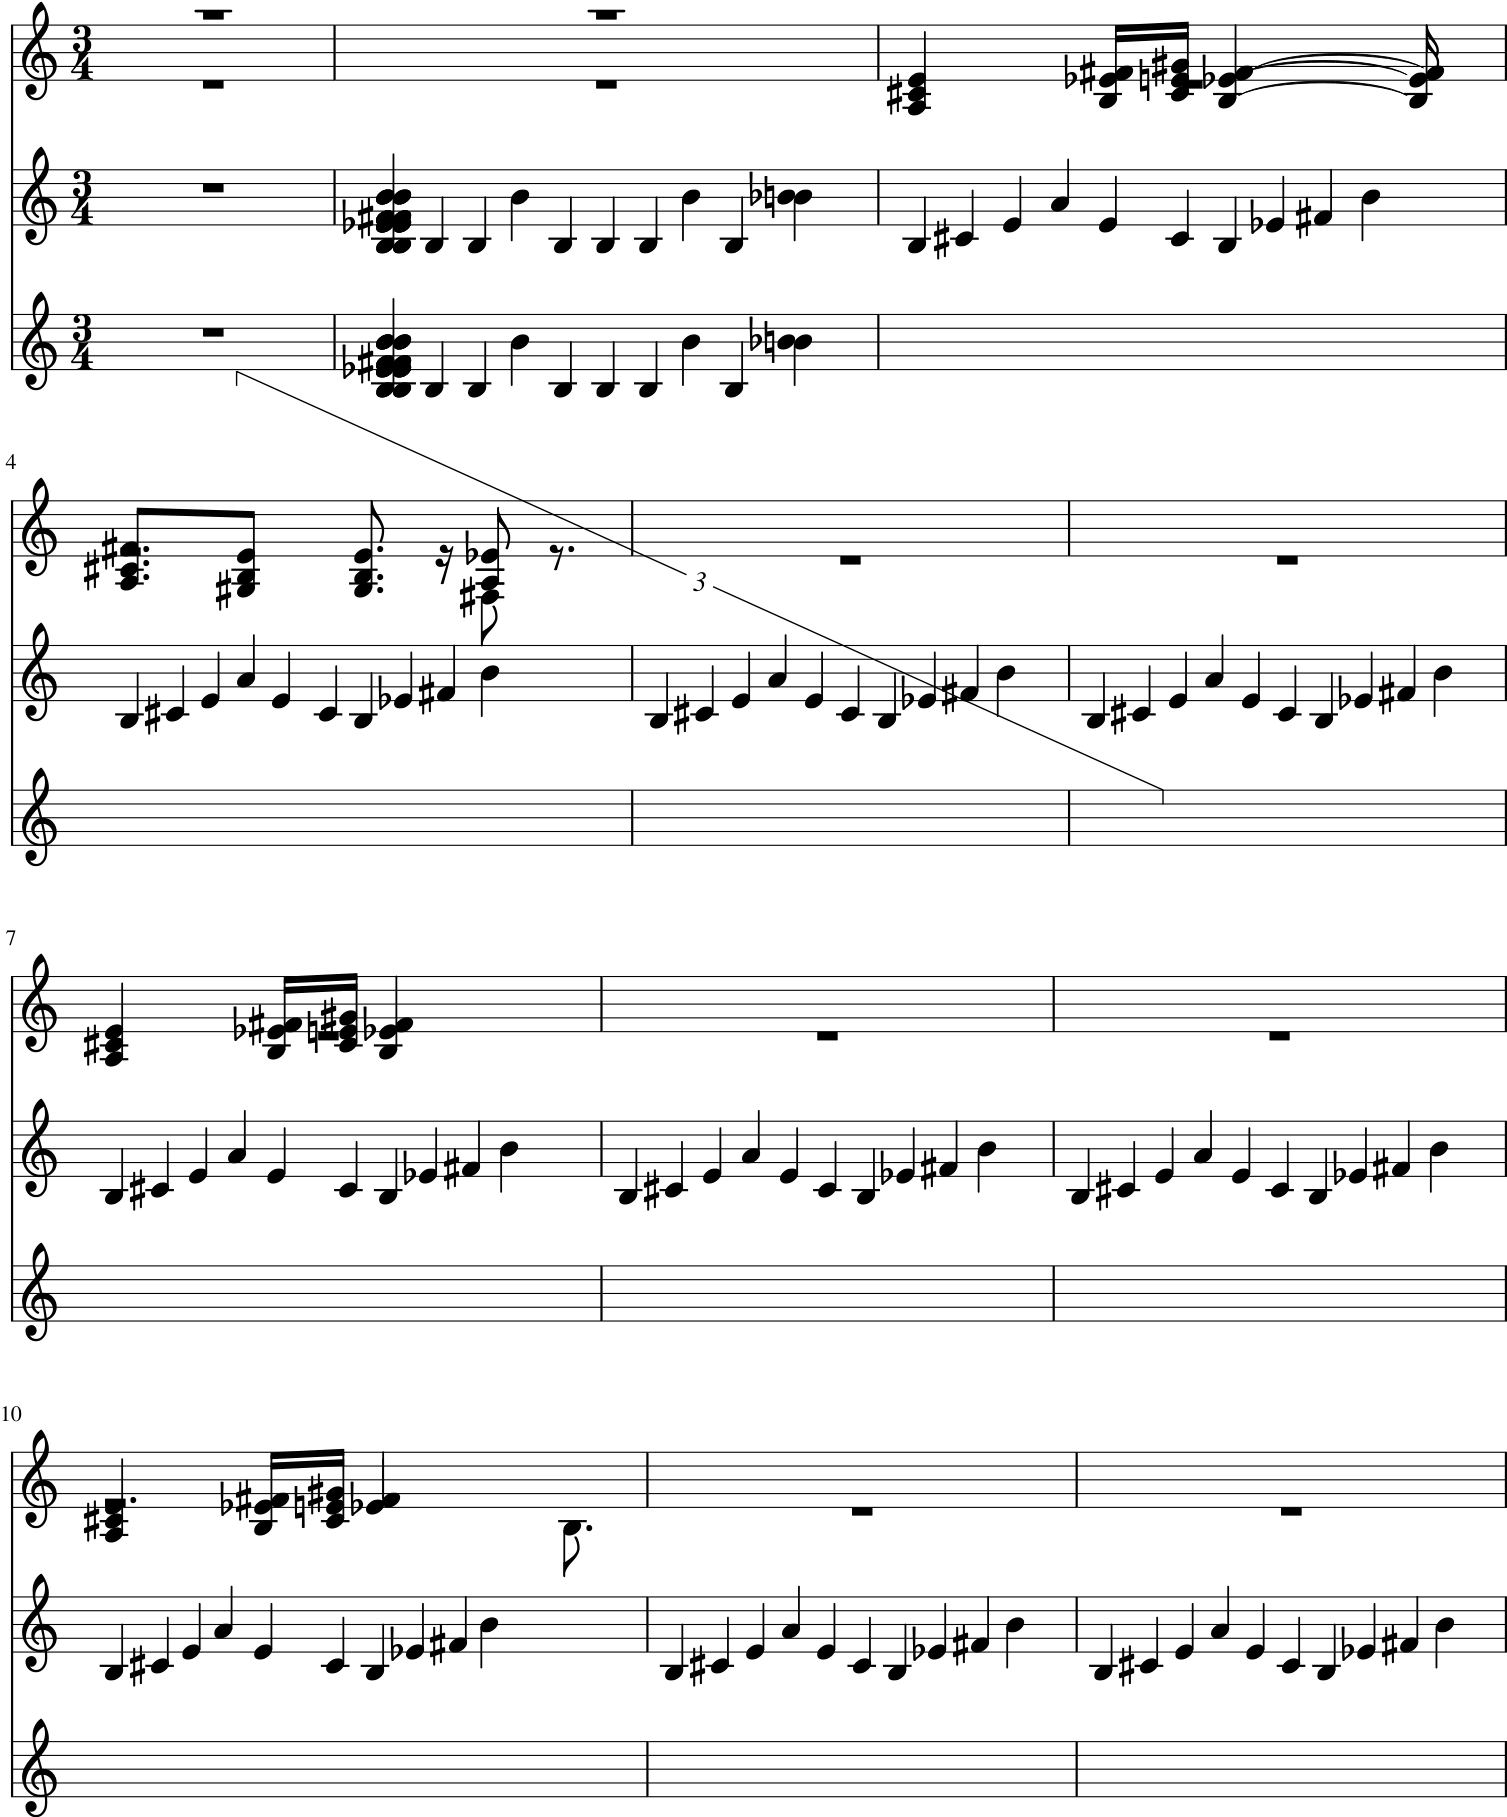

In [11]:
stream.show()

In [12]:
stream.show('midi')

In [13]:
stream.highestTime*4

729.3333333333334

In [14]:
list(stream.flat.getInstruments())

[<music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Violin Violin>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>,
 <music21.instrument.Guitar Guitar>]

In [ ]:
arr2csv(processed, out_csv); len(processed)

In [29]:
df = pd.read_csv(out_csv); df.head()

189846